In [53]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv', encoding='cp949')

In [56]:
df.shape

(686, 38)

In [57]:
df.isnull().sum()

영화명           0
영화코드          0
개봉일           0
대표국적          0
국적            0
장르            0
등급            0
영화형태          0
영화구분          0
제작사          17
배급사           0
상영횟수          0
전국스크린수        0
전국매출액         0
전국관객수         0
서울매출액         0
서울관객수         0
F-rated       0
감독            0
대표감독          0
감독코드          0
감독성별          0
감독_대표역할       0
감독필모          0
작가            0
대표작가          0
대표작가(필명)      0
작가코드          0
작가성별          8
작가_대표역할       0
작가필모          0
배우            0
주연배우          0
배역명         166
배우코드          0
배우성별          0
배우_대표역할       0
배우필모          0
dtype: int64

In [58]:
df[df['작가성별'].isnull()]['영화명']

322               마리안느와 마가렛
325           서서평, 천천히 평온하게
348        청춘 합창단 - 또 하나의 꿈
450                      라라
537                      명당
571           런닝맨 : 풀룰루의 역습
597    극장판 헬로카봇: 옴파로스 섬의 비밀
672                     김복동
Name: 영화명, dtype: object

In [60]:
df['F-rated'].value_counts()

0    353
1    224
2     60
3     49
Name: F-rated, dtype: int64

In [61]:
# F-rated 다시 구하기
f_rated = []
for i, row in df.iterrows():
    answer = 0
    if row['배우성별'] == '여자' : answer += 1
    if row['작가성별'] == '여자' : answer += 1
    if row['감독성별'] == '여자' : answer += 1
    f_rated.append(answer)
df['F-rated'] = f_rated

In [62]:
df['F-rated'].value_counts()

0    350
1    225
2     62
3     49
Name: F-rated, dtype: int64

In [63]:
# csv 파일에 F-rated 업데이트
df.to_csv('../01.Data_Collection/films_updated.csv', index=False)

In [64]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

In [65]:
df.sample()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
118,꾸루꾸루와 친구들: 무지개 나무의 비밀,20158682,2015-11-19,한국,한국,애니메이션,전체관람가,장편,일반영화,(주)팡고엔터토이먼트,(주)팝엔터테인먼트,591,103,51367500.000000,7345,9269000,1152,1,문제대,문제대,10026803,남자,감독,꾸루꾸루와 친구들: 무지개 나무의 비밀,문제대,문제대,문제대,10026803,남자,감독,꾸루꾸루와 친구들: 무지개 나무의 비밀,서유리,서유리,NaN,20195167,여자,배우,극장판 공룡메카드: 타이니소어의 섬|꾸루꾸루와 친구들: 무지개 나무의 비밀|위층여자


#  F등급별 매출액 비교

## 1. 전국매출액 단순 비교
* F등급 0인 영화의 분포는 분산이 매우 크다. 
    * 특히 2019년 개봉작 '극한직업'의 상영횟수와 매출액은 눈에 띄는 아웃라이어: 이전 해에도 이런 천만영화는 있긴 했을텐데 얘가 유난히 큰 걸 보면 몰아주기 현상이 최근으로 올 수록 점점 더 심해지는 것 아닐까?
    * 극한직업은 현재 매출액 2위
    * 극한직업의 전국관객수 = 95UBD (1위 명량 = 100UBD)
* 중간값으로 비교했을 때 F등급 0은 3의 33.1배

In [13]:
sales_des = df.groupby('F-rated')['전국매출액'].describe()
sales_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,353.000000,8357173553.645892,19204140881.813251,2237000.000000,19563000.000000,284650500.000000,6385295880.000000,139648000000.000000
1,224.000000,4461300367.022322,12267215045.686111,3389900.000000,40864575.000000,245478450.000000,2765706496.500000,98463132781.000000
2,60.000000,3647915275.316667,6733897491.272585,4166700.000000,24506862.500000,181474130.000000,3446515587.000000,28869614062.000000
3,49.000000,622670655.571429,1755951329.888669,6701500.000000,17045200.000000,40094400.000000,192729750.000000,8881616256.000000


In [14]:
# Cohen's d
(sales_des.iloc[0,1] - sales_des.iloc[3,1]) / df['전국매출액'].std()

0.4903494317664696

In [15]:
# 중간값으로 비교했을 때 F등급 0은 3의 33배
sales_des.iloc[0,-2] / sales_des.iloc[3,-2]

33.13082635140657

In [16]:
sales_des.loc()

<Figure size 1440x1080 with 0 Axes>

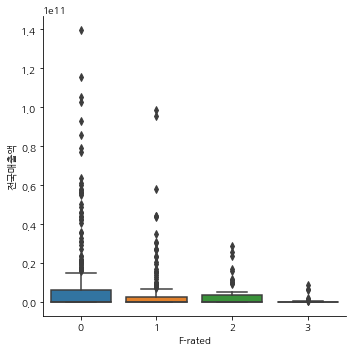

In [17]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='전국매출액', data=df, kind='box')

In [18]:
df[df['전국매출액']==139647979516]

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모


In [19]:
# 극한직업 UBD
16264944 / 170000

95.6761411764706

## 2. 상영횟수 비교
* 상영횟수 중간값: F등급 0이 3의 10.1배

In [20]:
show_des = df.groupby('F-rated')['상영횟수'].describe()
show_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,353.000000,25303.339943,44013.308042,41.000000,392.000000,2916.000000,30376.000000,292578.000000
1,224.000000,16053.120536,30464.671119,45.000000,611.250000,2564.000000,17497.500000,184198.000000
2,60.000000,17392.500000,27941.770136,96.000000,490.500000,1885.000000,19841.500000,120808.000000
3,49.000000,3989.142857,9014.214541,140.000000,406.000000,608.000000,3005.000000,41970.000000


In [21]:
# 중간값 비교
show_des.iloc[0,-2] / show_des.iloc[3,-2]

10.108485856905158

<Figure size 1440x1080 with 0 Axes>

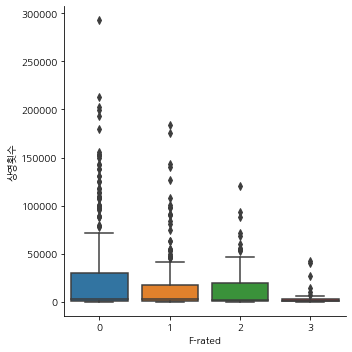

In [22]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='상영횟수', data=df, kind='box')

## 3. 상영횟수 대비 매출액 비교 
* 회당 평균 매출액 중간값 비교: F등급 0이 3의 2.4배
* 매출액을 단순비교했을 때는 27.1배였는데 2.4배로 낮아짐 -> 여성영화가 상영기회가 적은 것에 비해 좋은 결과를 내고 있음

In [23]:
df['회당 평균 매출액'] = df['전국매출액'] / df['상영횟수']

In [24]:
sales_avg_des = df.groupby('F-rated')['회당 평균 매출액'].describe()
sales_avg_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,353.000000,156528.699007,131971.127293,15922.324159,53692.105263,114289.157114,226809.171042,707758.081588
1,224.000000,134074.817301,105438.106584,12607.660455,53589.290309,96288.161483,179921.688477,561962.484410
2,60.000000,120734.026810,78176.750153,20012.500000,50045.635072,108471.703165,175098.708694,302757.481088
3,49.000000,78231.124915,51349.993278,16052.380952,41386.460033,65944.736842,95623.899435,242314.261272


In [25]:
# Cohen's d -> 이걸로 비교 못할 것 같은데...
(sales_avg_des.iloc[0,1] - sales_avg_des.iloc[3,1]) / df['회당 평균 매출액'].std()

0.6680263115670679

In [26]:
# 중간값 비교
sales_avg_des.iloc[0,-2] / sales_avg_des.iloc[3,-2]

2.3718879106900927

스크린마다 수용가능 관객수가 다르고 특정 영화만 대형관에 상영되는 것, 프라임 시간대에 배정되는 것이 중요한 feature 될 수 있음  
-> 각 영화가 어떤 스크린에서 상영했는지에 대한 데이터, 스크린별 수용인원 데이터, 상영시간표 데이터 추가로 필요

## 4. 스크린수 비교
* 스크린수는 개봉 첫 주 최대 스크린수를 의미함
* 전국스크린수 중간값: F등급 0이 3의 7배

In [27]:
screen_des = df.groupby('F-rated')['전국스크린수'].describe()
screen_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,353.000000,421.951841,480.377575,1.000000,25.000000,219.000000,751.000000,2235.000000
1,224.000000,338.142857,367.307470,1.000000,44.750000,192.500000,540.250000,1906.000000
2,60.000000,341.833333,386.622628,3.000000,23.250000,118.500000,580.000000,1431.000000
3,49.000000,122.714286,192.118345,9.000000,18.000000,30.000000,106.000000,790.000000


In [28]:
# 중간값 비교
screen_des.iloc[0,-2] / screen_des.iloc[3,-2]

7.084905660377358

<Figure size 1440x1080 with 0 Axes>

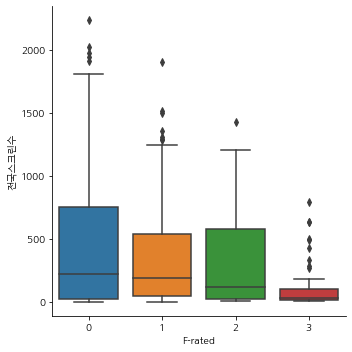

In [29]:
plt.figure(figsize=[20,15])
sns.catplot(x='F-rated', y='전국스크린수', data=df, kind='box')

## 5. 스크린수 대비 매출액 비교 
* 스크린당 평균 매출액 중간값 비교: F등급 0이 3의 4.4배
* 매출액을 단순비교했을 때는 27.1배였는데 4.4배로 낮아짐 -> 여성영화가 적은 스크린을 배당받고 있는 것에 비해 좋은 결과를 내고 있음

In [30]:
df['스크린당 평균 매출액'] = df['전국매출액'] / df['전국스크린수']

In [31]:
sales_avg_des2 = df.groupby('F-rated')['스크린당 평균 매출액'].describe()
sales_avg_des2

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,353.000000,8139560.065358,13542142.924762,165650.000000,738703.921569,1822680.000000,9425564.078363,98707706.766917
1,224.000000,5547131.695039,9277128.554974,171095.121951,737896.330275,1845523.540203,5672803.395126,64821022.238973
2,60.000000,4989115.711444,6220441.732805,409959.803922,859168.051889,1382264.801971,6952103.192816,24927032.609568
3,49.000000,2194816.302522,2503261.297080,364889.583333,751472.222222,1363166.666667,2157107.142857,11242552.222785


In [32]:
# 중간값 비교
sales_avg_des2.iloc[0,-2] / sales_avg_des2.iloc[3,-2]

4.369539134657065

# 배급사별 F등급 영화 비율

In [33]:
df['배급사'].unique()

array(['메가박스중앙(주)플러스엠', '(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스', '씨제이이앤엠(주)',
       '(주)넥스트엔터테인먼트월드(NEW)', '(주)인디플러그', '고구마콘텐츠허브(주)', '미라클필름',
       '(주)쇼박스', '애니메이션 배급, 씨앗,㈜인디스토리', '(주)리틀빅픽쳐스,(주)이수C&E',
       '(주)드림팩트엔터테인먼트', '에이원엔터테인먼트', '(주)시네마달',
       'KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)', '아방가르드 필름', '(주) 루스이소니도스',
       '어썸피플,어뮤즈', 'CGV아트하우스', '씨네그루(주)다우기술', '㈜인디스토리', '(유)조이앤시네마',
       '(주)나이너스엔터테인먼트', '노바엔터테인먼트', '오퍼스픽쳐스(유)', '(주)리틀빅픽쳐스',
       '(주)스톰픽쳐스코리아', '(주)대명문화공장,(주)나이너스엔터테인먼트',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트', '하준사', '(주)와우픽쳐스,(주)쇼박스',
       '롯데쇼핑㈜롯데엔터테인먼트', '(주)영화사 진진', '(주)트리필름', '(주)시네마서비스',
       '이십세기폭스코리아(주)', '(주)따미픽쳐스', '무브먼트', '(주)리틀빅픽쳐스,(주)인벤트스톤',
       '예지림엔터테인먼트', '와이드 릴리즈(주)', '(주)콘텐츠윙', '(주)씨에이씨엔터테인먼트', '파이오니아21',
       '(주)엣나인필름', '주식회사 디에스이이디', '판씨네마(주)', '(주)인벤트스톤', '(주)콘텐츠판다',
       '(주)에이원엔터테인먼트', '골든타이드픽처스(주)', '(주)인벤트스톤,(주)영화사오원',
       '(주)영화제작전원사 ,(주)넥스트엔터테인먼트월드(NEW)', '메가박스중앙(주)플러스엠,(주)엣나인필름',
       '(주)스마일이엔티', '필라멘트픽쳐스', 'TCO(주)더콘텐츠온,(주)전망좋은 영화사

In [34]:
len(df[df['배급사'] == '롯데쇼핑㈜롯데엔터테인먼트'])

23

In [35]:
len(df[df['배급사'] == '롯데쇼핑(주)롯데엔터테인먼트'])

0

In [36]:
len(df[df['배급사'] == '롯데컬처웍스(주)롯데엔터테인먼트'])

15

In [37]:
len(df[df['배급사'] == '롯데컬처웍스㈜롯데엔터테인먼트'])

0

In [38]:
len(df[df['배급사'] == '(주)롯데엔터테인먼트'])

0

In [39]:
len(df[df['배급사'] == '㈜롯데엔터테인먼트'])

0

롯데엔터테인먼트는 2018년 5월 31일까지는 롯데쇼핑 소속, 2018년 6월 1일 이후 롯데컬처웍스 소속으로 배급사 이름이 나눠져 있음  
-> 모두 '롯데컬처웍스(주)롯데엔터테인먼트'로 입력한다.

In [40]:
df.loc[df['배급사'] == '롯데쇼핑㈜롯데엔터테인먼트', '배급사'] = '롯데컬처웍스(주)롯데엔터테인먼트'

In [41]:
# 배급사별 F등급 비율 구하기

f_rating_proportion = pd.DataFrame({'F-rated': [0, 1, 2, 3]})

for cp in df['배급사'].unique():
    dist = df[df['배급사'] == cp]
    by_dist = (dist.groupby('F-rated')['영화명'].count() / len(dist) * 100).reset_index().rename(columns = {'영화명':cp})
    f_rating_proportion = f_rating_proportion.merge(by_dist, how='left', on='F-rated')

f_rating_proportion = f_rating_proportion.T.drop('F-rated', axis=0) 

In [42]:
f_rating_proportion.head()

,0,1,2,3
메가박스중앙(주)플러스엠,39.130435,39.130435,17.391304,4.347826
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",100.000000,nan,nan,nan
씨제이이앤엠(주),56.603774,35.849057,3.773585,3.773585
(주)넥스트엔터테인먼트월드(NEW),63.265306,28.571429,6.122449,2.040816
(주)인디플러그,33.333333,38.888889,11.111111,16.666667


In [43]:
film_numbers = df['배급사'].value_counts().reset_index().set_index('index').rename(columns={'배급사':'영화개수'})
del film_numbers.index.name
film_numbers.head()

,영화개수
씨제이이앤엠(주),53
(주)넥스트엔터테인먼트월드(NEW),49
롯데컬처웍스(주)롯데엔터테인먼트,38
(주)리틀빅픽쳐스,36
(주)쇼박스,32


In [44]:
f_rating_proportion = f_rating_proportion.merge(film_numbers, how='inner', left_index=True, right_index=True).sort_values('영화개수')
f_rating_proportion
# 배급사가 두 개 이상인 것은 어떻게 할까?

,0,1,2,3,영화개수
(주)프레인글로벌,100.000000,nan,nan,nan,1
(주)에스와이코마드,nan,100.000000,nan,nan,1
"씨네그루(주)키다리이엔티,주식회사 키위컴퍼니",100.000000,nan,nan,nan,1
52DAYS FILM,nan,100.000000,nan,nan,1
"메가박스중앙(주)플러스엠,주식회사 키위컴퍼니",100.000000,nan,nan,nan,1
"이언픽쳐스,(주)그란",nan,nan,100.000000,nan,1
M&M 인터내셔널,nan,100.000000,nan,nan,1
"(주)나이너스엔터테인먼트,주식회사 시온픽쳐스",100.000000,nan,nan,nan,1
"메가박스중앙(주)플러스엠,(주)키위미디어그룹",100.000000,nan,nan,nan,1
"(주)엣나인필름,(주)시네마달",100.000000,nan,nan,nan,1


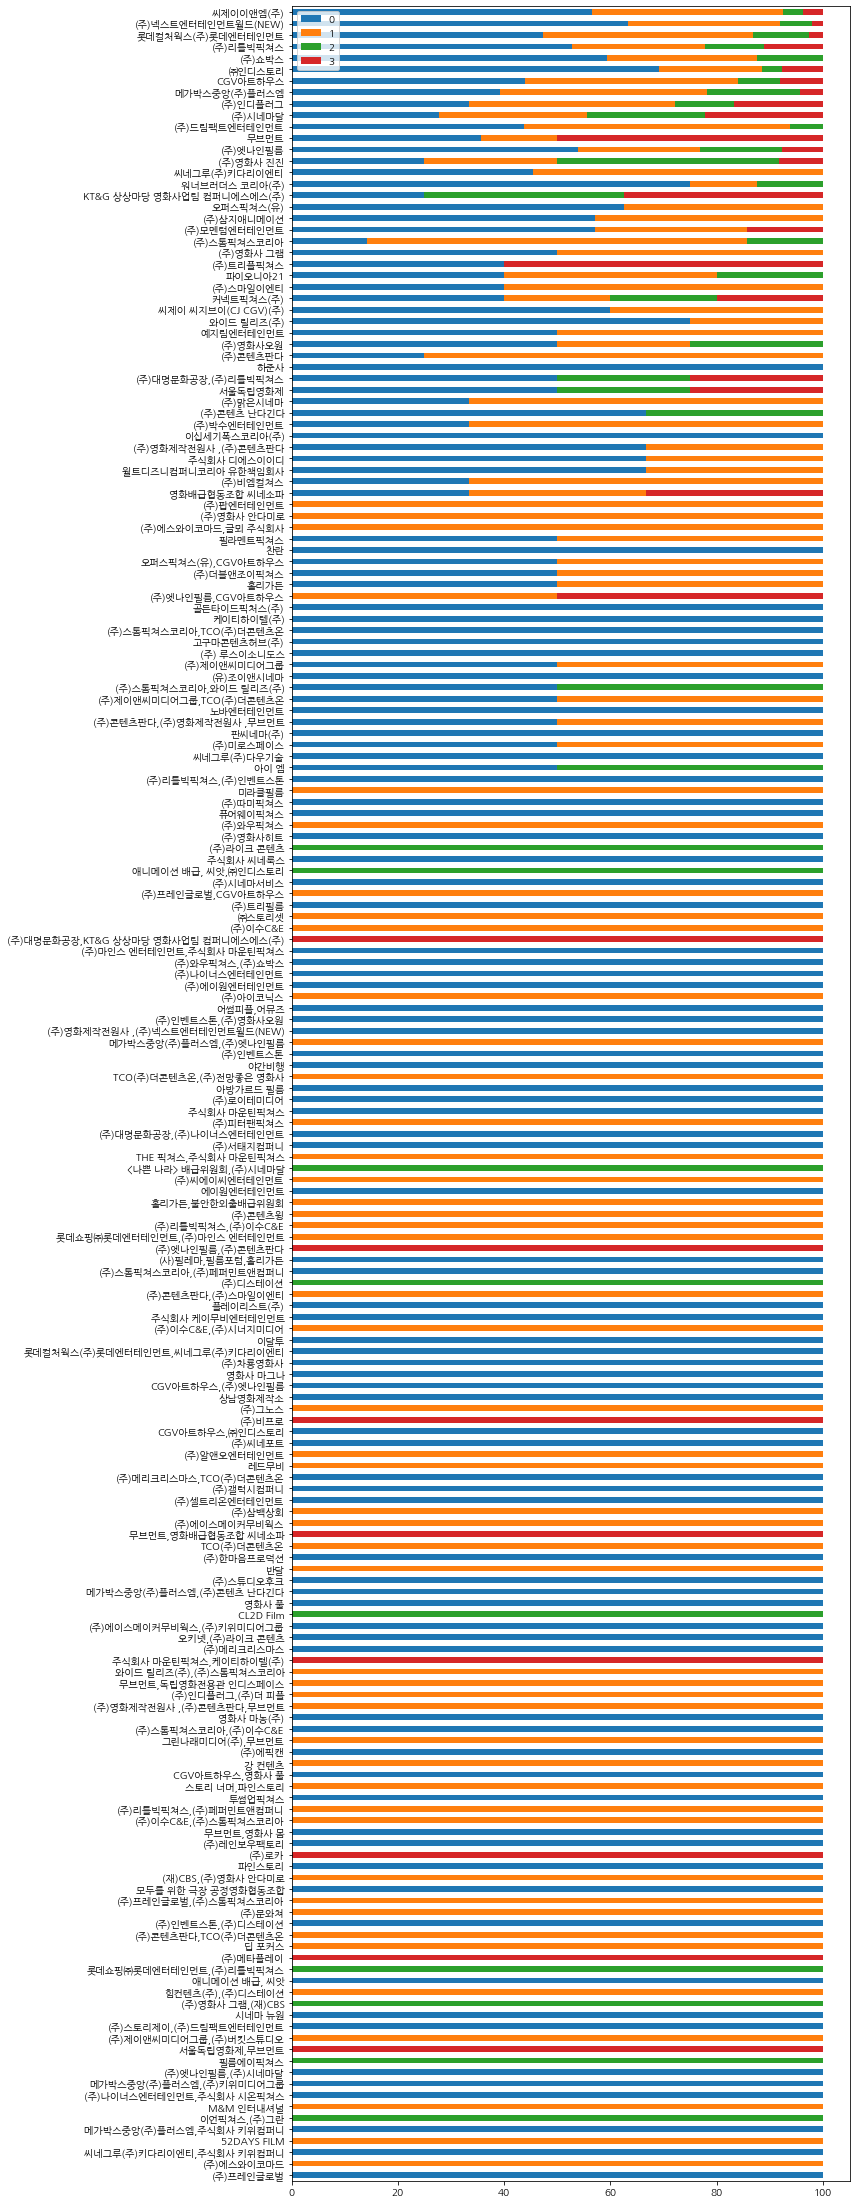

In [45]:
plt.rcParams["figure.figsize"] = (10,40)
f_rating_proportion.iloc[:, :4].plot(kind='barh', stacked=True)

In [46]:
# 배급사별 상영횟수
show_numbers = df.groupby('배급사')['상영횟수'].sum().reset_index().set_index('배급사').sort_values('상영횟수')
show_numbers

,상영횟수
배급사,
아방가르드 필름,41
(주)피터팬픽쳐스,45
(주)에픽캔,48
(주)영화사히트,49
(주)씨에이씨엔터테인먼트,50
영화사 마그나,50
퓨어웨이픽쳐스,51
(주)갤럭시컴퍼니,51
(주)로이테미디어,57


In [47]:
f_rating_proportion = f_rating_proportion.merge(show_numbers, how='inner', left_index=True, right_index=True).sort_values('상영횟수')
f_rating_proportion

,0,1,2,3,영화개수,상영횟수
아방가르드 필름,100.000000,nan,nan,nan,1,41
(주)피터팬픽쳐스,nan,100.000000,nan,nan,1,45
(주)에픽캔,100.000000,nan,nan,nan,1,48
(주)영화사히트,100.000000,nan,nan,nan,1,49
(주)씨에이씨엔터테인먼트,nan,100.000000,nan,nan,1,50
영화사 마그나,100.000000,nan,nan,nan,1,50
(주)갤럭시컴퍼니,100.000000,nan,nan,nan,1,51
퓨어웨이픽쳐스,100.000000,nan,nan,nan,1,51
(주)로이테미디어,100.000000,nan,nan,nan,1,57
㈜스토리셋,nan,100.000000,nan,nan,1,62


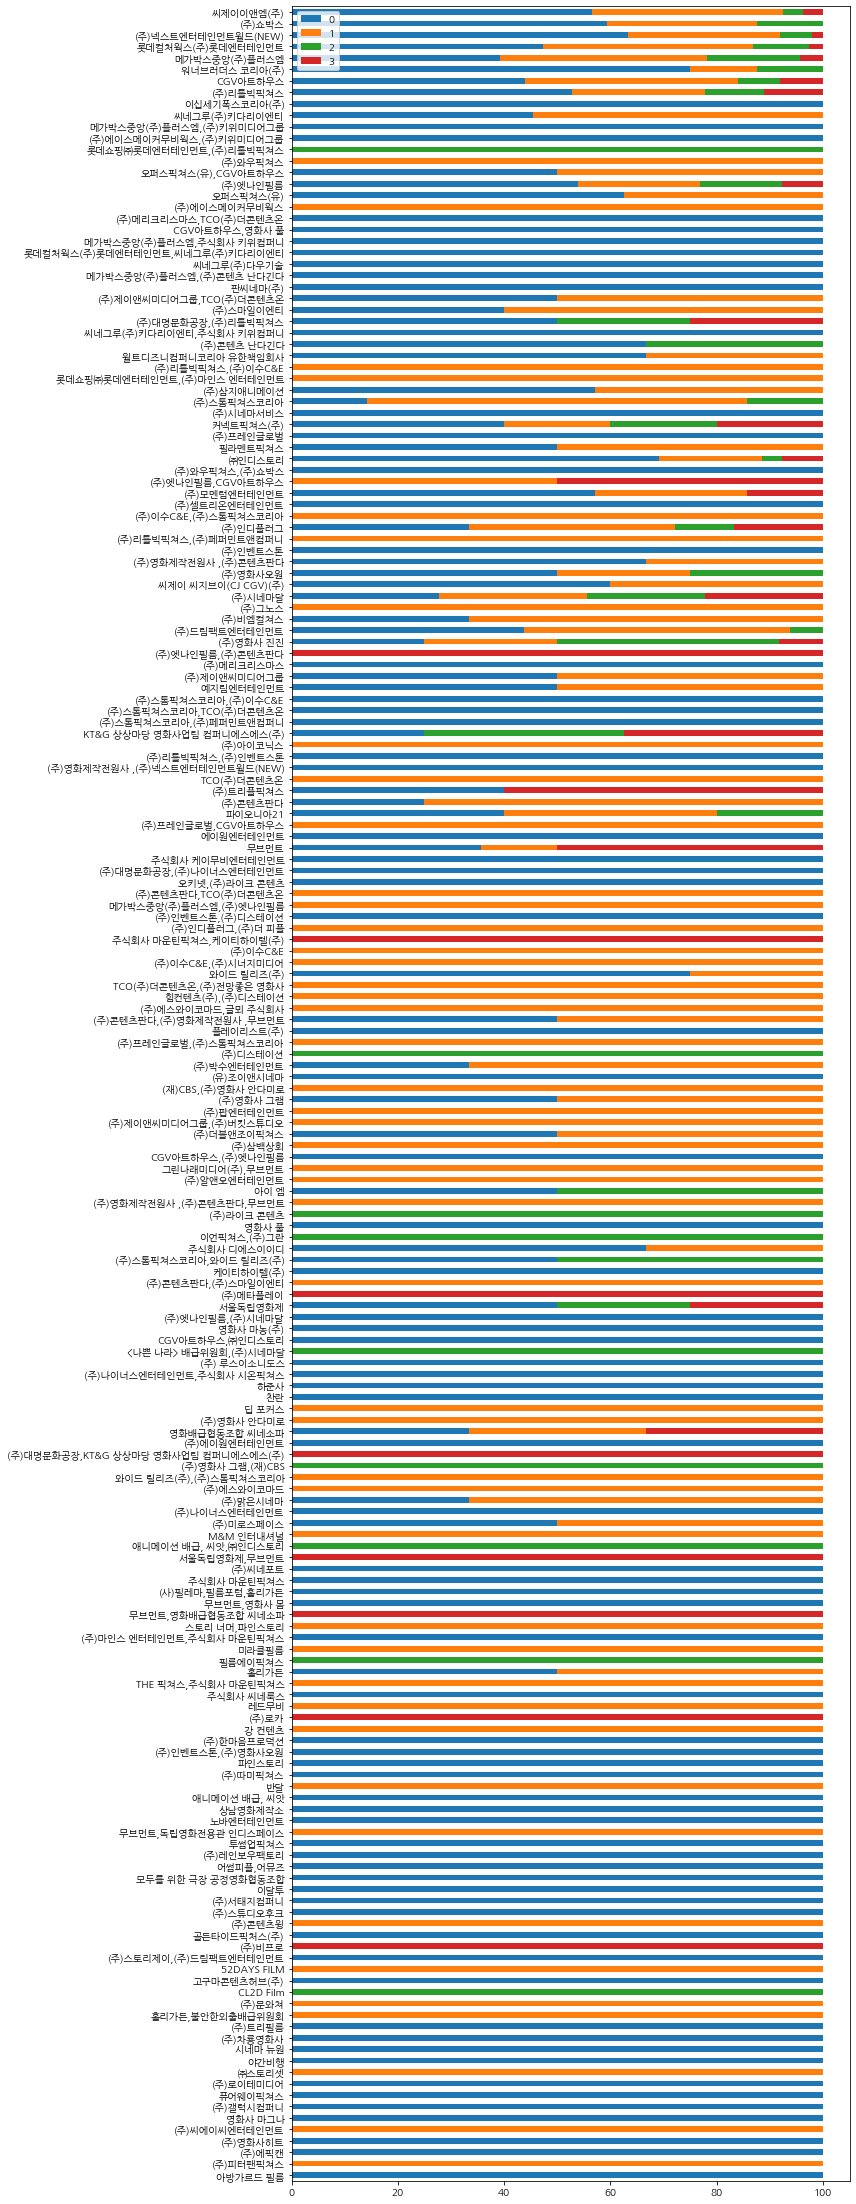

In [48]:
plt.rcParams["figure.figsize"] = (10,40)
f_rating_proportion.iloc[:, :4].plot(kind='barh', stacked=True)

In [49]:
# 대,중,소 이런 식으로 배급사 등급을 나눠서 본다.
# 합작의 경우는 0.5, 0.5씩 나눠서 본다.

제작사로도 봤는데 가장 많이 만든 곳이 10개의 영화를 만들었고 '한국영상아카데미'임.  
배급사만큼 몇몇 대형제작사가 아주 많은 영화를 제작하는 현상이 없어서 비교가 어려움.

In [52]:
df[df['배급사']=='워너브러더스 코리아(주)']

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,회당 평균 매출액,스크린당 평균 매출액
235,밀정,20159646,2016-09-07,한국,"한국,미국",액션,15세이상관람가,장편,일반영화,"(주)다크서클픽쳐스,워너브러더스 코리아(주),(주)영화사하얼빈",워너브러더스 코리아(주),138162,1444,61158644831.000000,7487545,15436298021,1827424,0,김지운,김지운,10005852,남자,감독,"인랑|밀정|라스트 스탠드|악마를 보았다|악마를 보았다 감독판|좋은 놈, 나쁜 놈, ...","박종대, 이지민",박종대,박종대,20236906,남자,시나리오(각본),인랑|밀정,"송강호,공유,한지민,츠루미 신고,엄태구,신성록,서영주,박민우,이진한,이진한,임서영,...",송강호,NaN,10037018,남자,배우,비상선언|나랏말싸미|기생충|마약왕|택시운전사|제5열|밀정|사도|변호인|관상|설국열차...,442658.942625,42353632.154432
302,싱글라이더,20161723,2017-02-22,한국,한국,드라마,15세이상관람가,장편,일반영화,(주)퍼펙트스톰필름,워너브러더스 코리아(주),16746,576,2685519021.000000,351276,945782821,119087,2,이주영,이주영,20232106,여자,감독,싱글라이더,이주영,이주영,이주영,20232106,여자,감독,싱글라이더,"진남수,이병헌,공효진,안소희,장요한,최병구,이상원,연송하,백수장,김수진,최준영,강신철",진남수,고객1,10070433,남자,배우,싱글라이더,160367.790577,4662359.411458
365,브이아이피,20164174,2017-08-23,한국,한국,"범죄,드라마",청소년관람불가,장편,일반영화,"(주)영화사 금월,(주)페퍼민트앤컴퍼니",워너브러더스 코리아(주),44650,996,10956621835.000000,1373316,2863320535,345963,0,박훈정,박훈정,10029578,남자,감독,낙원의 밤|마녀|브이아이피|대호|신세계|혈투|부당거래|악마를 보았다,박훈정,박훈정,박훈정,10029578,남자,감독,낙원의 밤|마녀|브이아이피|대호|신세계|혈투|부당거래|악마를 보았다,"강소백,장동건,김명민,박희순,이종석,임보라,박재웅,박준서,박준호,신수정,안세진,조청...",강소백,강인한,20294389,남자,배우,신과함께-죄와 벌|브이아이피,245389.066853,11000624.332329
483,챔피언,20189783,2018-05-01,한국,한국,드라마,12세이상관람가,장편,일반영화,(주)코코너,워너브러더스 코리아(주),47320,874,9441064230.000000,1125319,1846376630,212475,0,김용완,김용완,20164846,남자,연출팀,챔피언|퀵|작은 연못|하모니|토끼와 리저드|핸드폰|사랑과 전쟁:열두 번째 남자|6년...,김용완,김용완,김용완,20164846,남자,연출팀,챔피언|퀵|작은 연못|하모니|토끼와 리저드|핸드폰|사랑과 전쟁:열두 번째 남자|6년...,"마동석,권율,한예리,박성일,유지연,이규호,이동진,이수정,김정화,이혜민,김지연,김지환...",마동석,종수,10021341,남자,배우,나쁜 녀석들: 더 무비|노리개: 그녀의 눈물|악인전|백두산|시동|성난황소|동네사람들...,199515.304945,10802132.986270
500,마녀,20185341,2018-06-27,한국,한국,"미스터리,액션",15세이상관람가,장편,일반영화,"(주)영화사 금월,(주)페퍼민트앤컴퍼니",워너브러더스 코리아(주),90843,1117,27242029463.000000,3189091,6459959863,732154,1,박훈정,박훈정,10029578,남자,감독,낙원의 밤|마녀|브이아이피|대호|신세계|혈투|부당거래|악마를 보았다,박훈정,박훈정,박훈정,10029578,남자,감독,낙원의 밤|마녀|브이아이피|대호|신세계|혈투|부당거래|악마를 보았다,"김다미,조민수,박희순,최우식,백승철,김하나,이강곤,이상용,백규현,김종면,김종훈,서영...",김다미,자윤,20302909,여자,배우,"안녕, 나의 소울메이트 (가제)|마녀|나를 기억해|2017 동명이인 프로젝트",299880.337098,24388567.111012
512,인랑,20170942,2018-07-25,한국,한국,"SF,액션",15세이상관람가,장편,일반영화,(주)루이스 픽쳐스,워너브러더스 코리아(주),25428,1085,6994748173.000000,897548,1768239473,216427,0,김지운,김지운,10005852,남자,감독,"인랑|밀정|라스트 스탠드|악마를 보았다|악마를 보았다 감독판|좋은 놈, 나쁜 놈, ...","김지운, 전철홍",김지운,김지운,10005852,남자,감독,"인랑|밀정|라스트 스탠드|악마를 보았다|악마를 보았다 감독판|좋은 놈, 나쁜 놈, ...","강동원,한효주,정우성,김무열,최민호,한예리,신은수,허준호,문예원,김현준,이가경,박형...",강동원,임중경,10000558,남자,배우,반도|인랑|쓰나미 LA|골든슬럼버|1987|마스터|가려진 시간|검사외전|검은 사제들...,275080.547939,6446772.509677
613,악질경찰,20197846,2019-03-20,한국,한국,"범죄,드라마",청소년관람불가,장편,일반영화,"청년필름(주),다이스필름(주)",워너브러더스 코리아(주),22785,833,2256615278.000000,262233,543947088,61930,0,이정범,이정범,10057273,남자,감독,악질경찰|미씽: 사라진 여자|우는 남자|집으로 가는 길|아저씨|열혈남아|귀휴,이정범,이정범,이정범,10057273,남자,감독,악질경찰|미씽: 사라진 여자|우는 남자|집으로 가는 길|아저씨|열혈남아|귀휴,"이선균,전소니,박해준,송영창,박병은,김민재,남문철,정가람,이유영,권오상,오희준,윤지...",이선균,박누가,10055970,남자,배우,기생충|킹메이커 : 선거판의 여우|악질경찰|PMC: 더 벙커|미옥|임금님의 사건수첩...,99039.511872,2709021.942377
679,광대들: 풍문조작단,20185985,2019-08-21,한국,한국,사극,12세이상관람가,장편,일반영화,(주)영화사심플렉스,워너브러더스 코리아(주),29045,806,5226776088.000000,637021,1097148968,129821,0,김주호,김주호,20030155,남자,감독,광대들: 풍문조작단|허삼관|바람과 함께 사라지다|의형제|속눈썹|탐정 반기평 |프렌드...,신동익,신동익,신동익,10040301,남자,시나리오(각본),광대들: 풍문조작단|수상한 그녀|글러브|식객2 : 김치전쟁|내 사랑|식객|마음이.....,"조진웅,손현주,박희순,고창석,최원영,김슬기,윤박,김민석,장남열,김희찬,최귀화,정인기...",조진웅,김정호,10067353,남자,배우,블랙머니|퍼펙트맨|광대들: 풍문조작단|클로즈 투 유(가제)|완벽한 타인|공작|독전:...,179954.418592,6484833.856079
